# Project: Patient Appointments Data Analysis using NoShowAppointments data file for May 2016 (from Kaggle)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The project analyzes patient appointment data. The investigation tries to analyze the data for factors that may contribute for a patient to show up or not show up for the appointment: Gender, Age, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received.

Question 1: Do health conditions Hypertension, Diabetes, Alcoholism, Handicap affect No-show?

Question 2: Does age and gender affect the patient from showing up for an appointment?

Question 3: Does SMS received help improve the attendance of a patient for appointment?


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Assessing Data

In [88]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [89]:
df.shape

(110527, 14)

In [90]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

The above assessment of data resulted in the following findings and several problems with the data:
1. The min age is -1 which is not possible
2. Here we observe that the ScheduledDay and AppointmentDay should be datetime data types
3. Hipertension should be correctly spelled as Hypertension
4. Handcap should be correctly spelled as Handicap
5. It is easier to conceptualize the No-show column to Show-up column, with 1 meaning the person showed up and 0 meaning the patient did not show up. This would make data analysis more straightforward.

In [92]:
df[(df['Age'].isin(['-1']))]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [93]:
df=df[~(df['Age'].isin(['-1']))]

In [94]:
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])

In [95]:
df['ScheduledDay']=df['ScheduledDay'].dt.date

In [96]:
df['AppointmentDay']=df['AppointmentDay'].dt.date

In [97]:
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)

In [98]:
df.rename(columns={'Handcap':'Handicap'}, inplace=True)

In [99]:
df.rename(columns={'No-show':'No_show'}, inplace=True)

In [100]:
df.No_show.replace(('Yes', 'No'), (1, 0), inplace=True)

In [101]:
bin_edges=[0,10,20,30,40,50, 60,70,80,90,100,110,120]
bin_names=['10','20','30','40', '50', '60','70','80','90','100','110','120']
df['Age_levels']=pd.cut(df['Age'], bin_edges, labels=bin_names)
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_levels
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,70
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,60
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,70
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,10
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,60
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,60
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,30
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,40


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   PatientId       110526 non-null  float64 
 1   AppointmentID   110526 non-null  int64   
 2   Gender          110526 non-null  object  
 3   ScheduledDay    110526 non-null  object  
 4   AppointmentDay  110526 non-null  object  
 5   Age             110526 non-null  int64   
 6   Neighbourhood   110526 non-null  object  
 7   Scholarship     110526 non-null  int64   
 8   Hypertension    110526 non-null  int64   
 9   Diabetes        110526 non-null  int64   
 10  Alcoholism      110526 non-null  int64   
 11  Handicap        110526 non-null  int64   
 12  SMS_received    110526 non-null  int64   
 13  No_show         110526 non-null  int64   
 14  Age_levels      106987 non-null  category
dtypes: category(1), float64(1), int64(9), object(4)
memory usage: 12.8+ MB


## Exploratory Data Analysis

In [103]:
df['No_show'].value_counts()

0    88207
1    22319
Name: No_show, dtype: int64

In [104]:
df['No_show'].value_counts(normalize=True)

0    0.798066
1    0.201934
Name: No_show, dtype: float64

In [105]:
def draw_hist(data, x_label, y_label, p_title):
    data.hist()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(p_title)

[Text(0, 0, 'Showed-up'), Text(1, 0, 'No-show')]

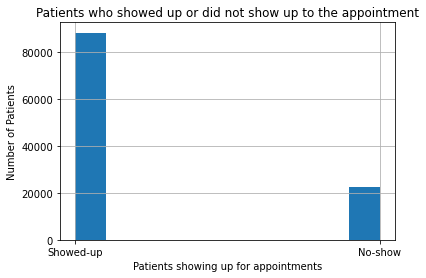

In [106]:
ax = plt.axes()
draw_hist(df['No_show'], 'Patients showing up for appointments', 'Number of Patients', 'Patients who showed up or did not show up to the appointment')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Showed-up', 'No-show'])


The above analysis shows that about 88,207 patients showed up for the appointment while 22,319 did not show up for the appointment. We will further analyse reasons for patients not showing up for the appointment

# Question 1: Do health conditions Hypertension, Diabetes, Alcoholism, Handicap affect No-show ?

In [107]:
def draw_plot(column, chart, y_label, p_title, xtick1, xtick2 ):
    ax = plt.axes()
    df.groupby(column).No_show.mean().plot(kind=chart)
    plt.ylabel(y_label)
    plt.title(p_title)
    ax.set_xticks([0, 1])
    ax.set_xticklabels([xtick1, xtick2])

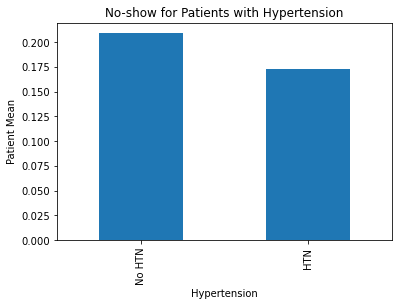

In [108]:
draw_plot('Hypertension','bar', 'Patient Mean', 'No-show for Patients with Hypertension', 'No HTN', 'HTN' )

Patient without hypertension had more no shows. So, hypertension did not contribute to no-shows

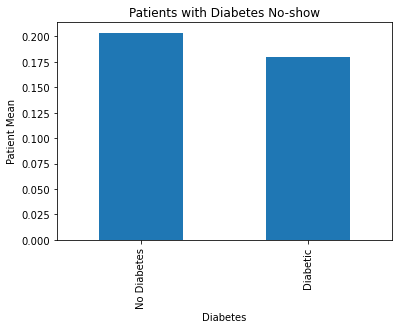

In [109]:
draw_plot('Diabetes','bar', 'Patient Mean', 'Patients with Diabetes No-show', 'No Diabetes', 'Diabetic' )

Patient without diabetes had more no shows. So, diabetes did not contribute to no-shows

In [ ]:
draw_plot('Alcoholism','bar', 'Patient Mean', 'Patients with Alcoholism No-show', 'No Alcoholism', 'Alcoholism' )

Alcoholism did not contribute to no-shows

In [ ]:
ax = plt.axes()
df.groupby('Handicap').No_show.mean().plot(kind='pie')
plt.ylabel('Patient Mean')
plt.title('Patients with Handicap No-show')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['No Handicap', '1', '2', '3', '4']) 

Patients with Level 4 handicap had maximum no-shows.

# Question 2: Does age and gender affect the patient from showing up for an appointment?

In [ ]:
draw_plot('Gender','bar', 'Patient Mean', 'Patients Male/Female No-show', 'Female', 'Male' )

Male and Females had almost equal no-shows

In [ ]:
ax = plt.axes()
df.groupby('Age_levels').No_show.mean().plot(kind='bar')
plt.ylabel('Patient Mean')
plt.title('Patients by Age_levels No-show')

Patients with different age levels had quite similar no-shows (except 110-120 years). 

# Question 3: Does SMS_received help improve the attendance of a patient for appointment?


In [ ]:
draw_plot('SMS_received','bar', 'Patient Mean', 'Patients SMS_received No-show', 'No SMS', 'Received SMS' )

Patients who received SMS had more no-shows

# Conclusions


Patient appointment data was analyzed to assess which factors may contribute to the patients not showing up for the appointment. 
1. Patients health conditions of hypertension, diabetes, or alcoholism  did not affect the no shows. Patients with Handicap 4 had maximum no-shows. It would be helful to focus on this group to further evaluate reasons for no-show
2. Patients Gender or Age did not significantly affect no-shows. 
3. Use of SMS to notify the patients about the appointment did not affect the no-shows

Limitation of the project
1. It would be helpful to have data regarding patient needing assistance for transport to get to the appointment that could be affecting attendance.
2. It would be helpful to know if the patient was admitted to a hospital or healthcare facility, that might affect patient from not making it to the appointment
3. Some messaging feedback from patient regarding reasoning for not making it to the appointment would be helpful to further improve the understanding reasons for patient not showing up
